# Tracy-Widom distribution

Tracy and Widom showed that the cumulative distribution function $F_2$ for the deviations of the largest eigenvalue of the GUE, suitably centred and normalized, is given by

$$F_2(x) = \exp(-I(x)),$$

where $$I(x) = \int_x^\infty (t-x) \, q(t)^2 dt,$$

so that $I''(x) = q(x)^2$, where $q(t)$ satisfies

$$\ddot{q}(t) = t \, q(t) + 2 q(t)^3.$$

We can set this up as the following system of ordinary differential equations:

## Analytics: numerical solution of the differential equation

$$
\frac{d}{dt}
\begin{pmatrix}
    q \\ q' \\ I \\ I'
\end{pmatrix}
=
\begin{pmatrix}
q' \\ t \, q + 2q^3 \\ I' \\ q^2
\end{pmatrix}
$$

with the boundary condition $q(t) \sim \mathrm{Ai}(t)$ as $t \to \infty$, where $\mathrm{Ai}(t)$ is the Airy function. We will denote $\mathbf{x} = (q, q', I, I')$. The boundary condition is imposed at a sufficiently large $t_0$ on both $q(t_0)$ and $q'(t_0)$.

We can solve this in Julia using the `ODE.jl` package for solving ODEs; the following is based on the original MATLAB code in Alan Edelman's book. 

We use the adaptive Runge-Kutta method `ode45` from the [`ODE.jl`](https://github.com/JuliaLang/ODE.jl) Julia package for solving ODEs.

In [90]:
using ODE   # Julia package for solving ODEs

In [131]:
t₀ = 4.0
t_final = -6.0

-6.0

In [148]:
xx0 = [airy(t0), airy(1, t0), 0, airy(t0)^2];

In [149]:
function Tracy_Widom(t, xx)    # xx is a vector
    q, q′, I, I′ = xx          # Extract its components;  "′" is written \prime<TAB>
    
    [q′, t*q + 2q^3, I′, q^2]  # return this vector
end

Tracy_Widom (generic function with 1 method)

In [150]:
t, xx = ode45(Tracy_Widom, xx0, [t0, t_final], maxstep=0.01) ;   

In [151]:
# Convert xx to a matrix and extract components:

xx = hcat(xx...)'
II = xx[:, 3]   # 3rd column
II′ = xx[:, 4];

We can now plot the PDF, given by $p(x) = F_2'(x) = -I'(x) \exp(-I(x))$:

In [152]:
using PyPlot

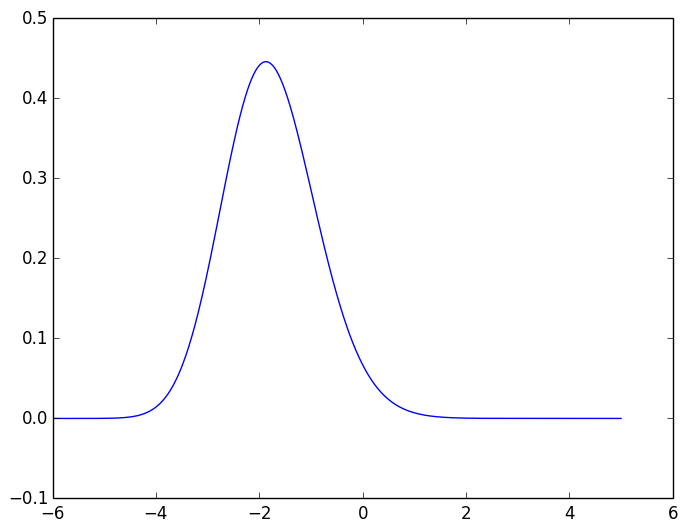

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x325cbb810>

In [176]:
pdf = -II′ .* exp(-II)
plot(t, pdf)

## Numerics: Monte Carlo

In [169]:
function maximum_evals(n, num_iterations)
    evals = Float64[]

    for i in 1:num_iterations
        M = randn(n, n) + im*randn(n, n)
        S = (M + M') / 2
        push!(evals, maximum(eigvals(S)))
    end
    
    evals = n^(1//6) * (evals - 2*√n)

end

maximum_evals (generic function with 1 method)

In [ ]:
v = @time maximum_evals(100, 5000);

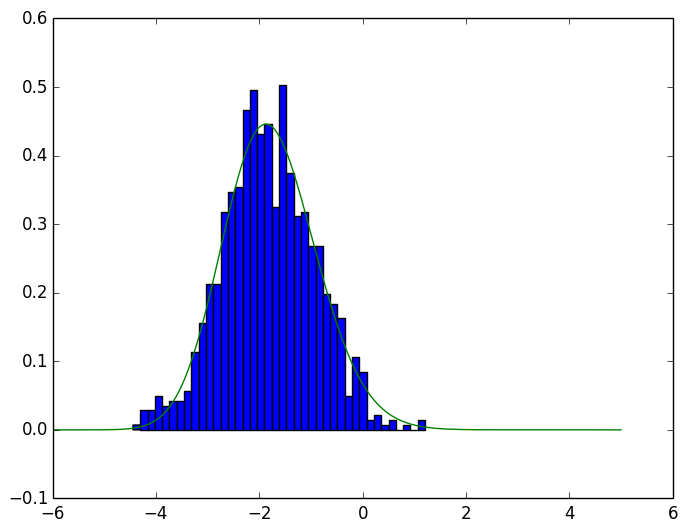

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x326036f50>

In [177]:
plt[:hist](v, 40, normed=true)
plot(t, pdf)